In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import cv2

In [2]:
#hand written characters 28x28 sized images of 0...9
mnist=tf.keras.datasets.mnist

Fix the download problem using the link below.

Mac: /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/keras/utils/data_utils.py 

https://github.com/tensorflow/tensorflow/issues/33285

In [3]:
(x_train,y_train), (x_test,y_test)=mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

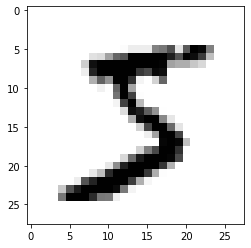

In [5]:
#before normalization
print(x_train[0])

plt.imshow(x_train[0],cmap=plt.cm.binary)

## Normalize

In [6]:
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)

## After Normalization

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

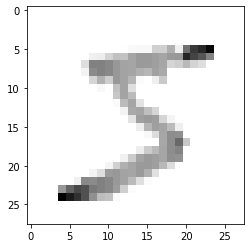

In [7]:
#after normalization
print(x_train[0])

plt.imshow(x_train[0],cmap=plt.cm.binary)

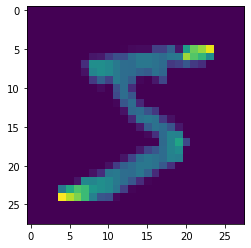

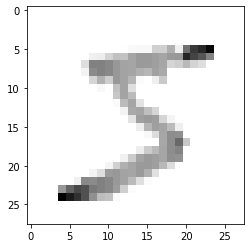

In [8]:
plt.imshow(x_train[0])
plt.show()

plt.imshow(x_train[0],cmap=plt.cm.binary)

In [9]:
#the label inside the network
print(y_train[0])

5


### Resizing the image for Convolutional Operation

In [10]:
IMG_SIZE=28
#increasing dimension by 1 for kernel=filter operation
x_trainr=np.array(x_train).reshape(-1, IMG_SIZE,IMG_SIZE,1)  #reshape(60000,28,28,1)
x_testr=np.array(x_test).reshape(-1,IMG_SIZE, IMG_SIZE,1)
print("Training Samples dimension",x_trainr.shape)
print("Testing Samples dimension",x_testr.shape)

Training Samples dimension (60000, 28, 28, 1)
Testing Samples dimension (10000, 28, 28, 1)


## Creating a DNN (Deep Neural Network)
Training with 60,000 samples

In [11]:
# create a neural net
model=Sequential()

# first convolution layer  (60000,28,28,1) 28-3+1=26x26
model.add(Conv2D(64,(3,3), input_shape=x_trainr.shape[1:])) # 64 filters with size of 3x3
model.add(Activation("relu")) # activation function to make it non-linear, <0, remove, >0
model.add(MaxPooling2D(pool_size=(2,2))) #maxpooling single maximum value of 2x2

# 2nd convolution layer    26-3+1=24x24
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# 3rd convolution layer
model.add(Conv2D(64,(3,3)))  #13x13
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# Fully connected layer #1   20x20=400
model.add(Flatten()) #before using fully connected layer, need to be flatten so that 2D to 1D
model.add(Dense(64))    #each 400 will be connected to each 64 neurons
model.add(Activation("relu"))

# Fully connected layer #2   20x20=400
model.add(Dense(32))    # decreasing the size gradually, we're trying to reach 10 bc we have labelled 10 digits 
model.add(Activation("relu"))

# Fully connected layer #3 (LAST)   20x20=400
model.add(Dense(10))    # the last dense layer must be equal to 10
model.add(Activation("softmax")) #activation with Softmax (can also be sigmoid for BINARY classification)(class probabilities, not for binary)
# softmax is useful for probability distributions

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          3

In [13]:
print("Total Traning Sample =",len(x_trainr))

Total Traning Sample = 60000


In [14]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam",metrics=['accuracy'])

## Training the model

In [15]:
model.fit(x_trainr, y_train, epochs=5,validation_split=0.3)

Epoch 1/5
1313/1313 [==============================] - 36s 21ms/step - loss: 0.6702 - accuracy: 0.7754 - val_loss: 0.1331 - val_accuracy: 0.9586
Epoch 2/5
1313/1313 [==============================] - 25s 19ms/step - loss: 0.1126 - accuracy: 0.9648 - val_loss: 0.1088 - val_accuracy: 0.9666
Epoch 3/5
1313/1313 [==============================] - 26s 20ms/step - loss: 0.0770 - accuracy: 0.9764 - val_loss: 0.0758 - val_accuracy: 0.9772
Epoch 4/5
1313/1313 [==============================] - 26s 20ms/step - loss: 0.0563 - accuracy: 0.9821 - val_loss: 0.0725 - val_accuracy: 0.9787
Epoch 5/5
1313/1313 [==============================] - 24s 18ms/step - loss: 0.0454 - accuracy: 0.9862 - val_loss: 0.0641 - val_accuracy: 0.9803


 For example if ( val_accuracy=30 and accuracy=98 ) => overfitting (solution example: you can dropout (some) layer(s))

## Predictions

In [16]:
# preditions are an array of class probabilities, so we need to decode them
predictions=model.predict([x_testr])

In [17]:
print(predictions) 

[[1.67849787e-08 1.12838879e-05 1.12341750e-05 ... 9.99861717e-01
  7.26658627e-08 1.54568188e-05]
 [1.10942696e-04 3.01328259e-06 9.99830246e-01 ... 2.77585077e-05
  5.24082907e-06 3.31364390e-06]
 [2.55946077e-07 9.99986410e-01 1.07510632e-08 ... 2.15752243e-06
  2.89683186e-07 6.26017436e-06]
 ...
 [4.55511451e-09 2.13289923e-06 5.80894499e-10 ... 2.39135858e-07
  1.26535190e-06 4.89767481e-05]
 [4.28073217e-05 2.42124329e-08 7.70454145e-10 ... 7.19575466e-09
  1.47342624e-04 1.95811594e-06]
 [2.39268388e-06 5.09516838e-07 3.62685023e-06 ... 1.53605001e-07
  4.88034675e-05 2.59286821e-06]]


## Evaluating the predictions
 Comparing test data vs predicted data

In [18]:
# in order to understand, convert the predictions from one hot encoding, we need to use numpy for that 
# argmax returns the max value index and find the value of it
print(np.argmax(predictions[0]))

7


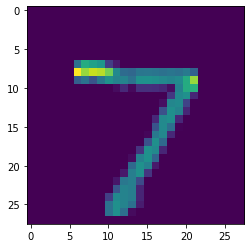

In [19]:
plt.imshow(x_test[0])

In [20]:
print(np.argmax(predictions[128]))

8


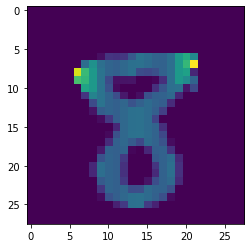

In [21]:
plt.imshow(x_test[128])

In [22]:
img = cv2.imread('m8.png')

TypeError: Image data of dtype object cannot be converted to float

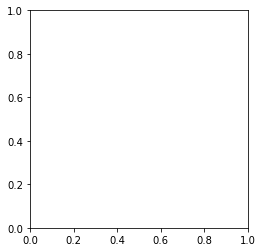

In [23]:
plt.imshow(img)

In [ ]:
img.shape

(592, 374, 3)

In [ ]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [ ]:
gray.shape

(592, 374)

In [ ]:
resized=cv2.resize(gray, (28,28), interpolation=cv2.INTER_AREA)

In [ ]:
resized.shape

(28, 28)

In [ ]:
norm_img=tf.keras.utils.normalize(resized,axis=1) # 0 to 1 scaling

In [ ]:
norm_img=np.array(norm_img).reshape(-1, IMG_SIZE, IMG_SIZE,1) #kernel operation of convolution layer

In [ ]:
norm_img.shape

(1, 28, 28, 1)

In [ ]:
predictions=model.predict(norm_img)

In [ ]:
print(np.argmax(predictions))

8
